<a href="https://colab.research.google.com/github/Obura98/K-Nearest-Neighbours-KNN-and-The-Naive-Bayes-Classifier-Models/blob/main/Week9IP_K_nearest_neighbor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict the chances of a passenger surving the titanic disaster based on parameters such as age, passenger class, port of embarkation

### b) Defining the Metric for Success

Model that predicts the chances of passenger surviving with an accuracy score of 75% and above

### c) Understanding the context 

RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time)[a] on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history.

### d) Recording the Experimental Design

1. Data Preparation and Cleaning
2. Feature Engineering
3. Exploratory Data Analysis
4. Modelling
5. Improving Model Performance
6. Evaluation

### e) Data Relevance

Importing Relevant Libraries to be used

In [1]:
# data manipulation/processing
import pandas as pd
# linear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

# preprocessing/scaling
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
from pandas_profiling import ProfileReport

## 2. Reading the Data

In [2]:
# Loading the Data from the source i.e. csv
# ---
# ---
#
train=pd.read_csv("/content/train (5) (1).csv")
test=pd.read_csv("/content/test (1).csv")



## 3. Checking the Data

In [3]:
# Determining the first five records of our datasets
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
##previewing the last 5 records of our 2 datasets
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Datasets Dictionary
1. Survived - Survival (0 = No; 1 = Yes)
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
4. Age - Age
5. SibSp - Number of Siblings/Spouses Aboard
6. Parch - Number of Parents/Children Aboard
7. Ticket - Ticket Number
8. Fare - Passenger Fare (British pound)
9. Cabin - Cabin
10. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [7]:
# Checking for the shape and size of the dataframe
#
print(f'The shape is {train.shape} and the size is {train.size}')
print("____________________________________________")

print(f'The shape is {test.shape} and the size is {test.size}')

The shape is (891, 12) and the size is 10692
____________________________________________
The shape is (418, 11) and the size is 4598


In [8]:
# Checking whether each column has an appropriate datatype
#
train.info()
### All the data types are appropriate except for the ticket column which should be an integer but we woont convert it as we wont be needing it in our prediction so we will drop it when doing cleaning..Small bam!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 5. Tidying the Dataset

Data cleaning for train dataset

In [9]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S


In [10]:
# So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
# ---
# Survived - This variable is obviously relevant.
# Pclass - Does a passenger's class on the boat affect their survivability?
# Sex - Could a passenger's gender impact their survival rate?
# Age - Does a person's age impact their survival rate?
# SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
# Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
# Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
# Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it.
# What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability. 
# And as we recall, the cabin variable is almost all missing values, so we can just drop all of these.
# 
train = train.drop(['PassengerId','Name','Ticket','Cabin'], 1)
train.head()
# Now we have the dataframe reduced down to only relevant variables, but now we need to deal with the missing values..Bam!!

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# Checking for missing values
train.isnull().sum()
##we have many 177 missing values and 2 in embarked....Lets first deal with the missing values in the age column

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

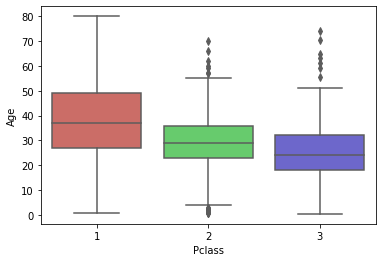

In [12]:

# Let's look at how passenger age is related to their class as a passenger on the boat.
# 
sb.boxplot(x='Pclass', y='Age', data=train, palette='hls')

In [13]:
train.head()

# we could say that the younger a passenger is, the more likely it is for them to be in 3rd class. 
# The older a passenger is, the more likely it is for them to be in 1st class. 
# So there is a loose relationship between these variables. 
# So, let's write a function that approximates a passengers age, based on their class. 
# From the box plot, it looks like the average age of 1st class passengers 
# is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# So let's write a function that finds each null value in the Age variable, and for each null, 
# checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.
#
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
# When we apply the function and check again for null values, we see that there are no more null values in the age variable.
#
train['Age'] = train[['Age', 'Pclass']].apply(age_approx, axis=1)
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
###lets now drop the missing value in embarked columns
train.dropna(inplace=True)
train.isnull().sum()
##Small bam....We have successfully dealt with outluers

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
# Checking for duplicates
#
train.duplicated().any()

True

In [18]:
# Checking for how many data points have been duplicated 
#
print(len(train[train.duplicated()]))

116


In [19]:

# Removing duplicates
# Keeping every first data point of the duplicated datapoints
#
train.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
#
train.duplicated().any()
###tripple bam!! we have removed all duplicates in our dataset

False

In [20]:
# For consistency and easy reference the columns should be uniform
# Changing all column names to lower case
#
train.columns = train.columns.str.lower()

# Previewing the columns to confirm whether the changes have taken effect
#
train.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

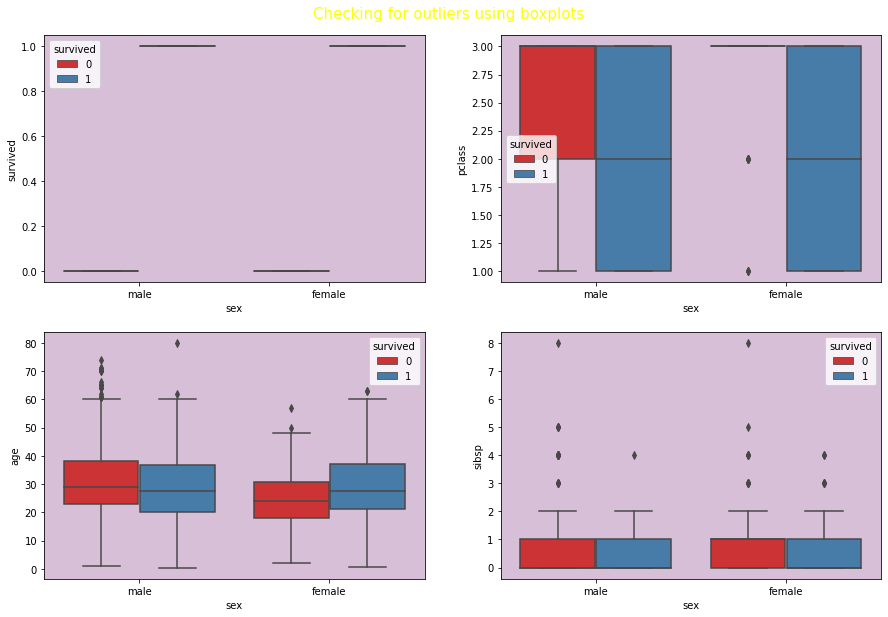

In [21]:
# Lets now deal with outliers
##we will find outliers of our numerical columns
num_cols=['survived','pclass','age','sibsp','parch',	'fare']

# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'yellow')
for ax, data, column in zip(axes.flatten(), train, num_cols):
  sns.boxplot(train.sex, train[column], ax = ax, hue = train.survived, palette = 'Set1')
  ax.set_facecolor('thistle') # Setting the background color to thistle

from the above boxplot we can note the following:


1.   survived column has no outlier
2.   P_class column also has no outlier
3. age column has outliers
4. siblings present has got also a few outliers



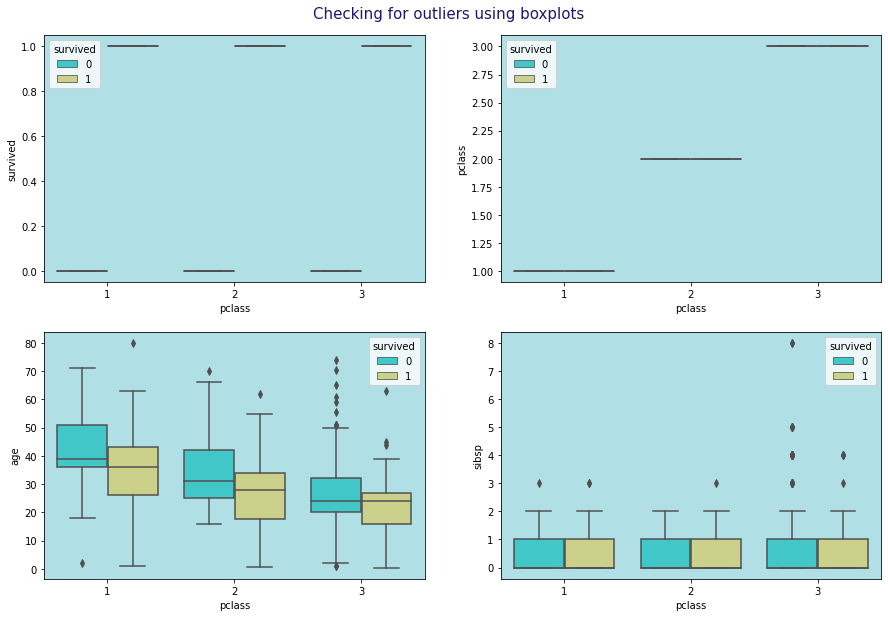

In [22]:
# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'midnightblue')
for ax, data, column in zip(axes.flatten(), train, num_cols):
  sns.boxplot(train.pclass, train[column], ax = ax, hue = train.survived, palette = 'rainbow')
  ax.set_facecolor('powderblue') # Setting the background color to powderblue

Though we have outliers in our dataset we wont remove them as this would affect our modelling process

## 6. Exploratory Analysis

Univariate analysis

In [23]:
train.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.25,S


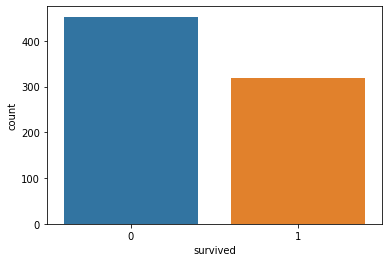

In [24]:
#Countplot for those that survived

ax = sns.countplot(x="survived", data=train)

#OMG alot of people died during the disaster

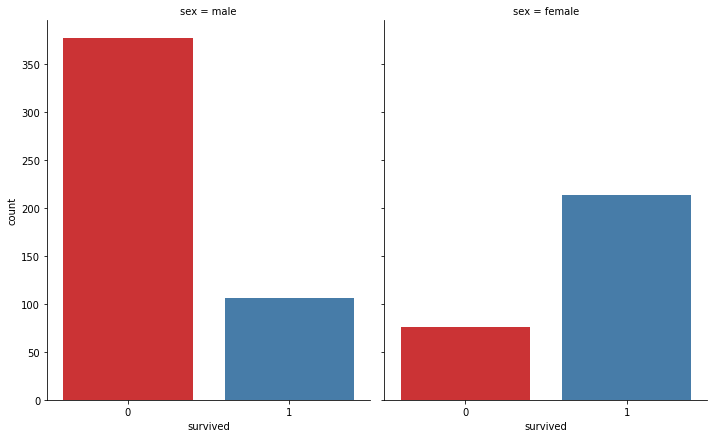

In [25]:
# Plotting bar charts
#
sns.catplot("survived", col="sex", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the bar graph I made the following conclusions:


1.   More males did not survive the titanic disaster
2.   More females survived the titanic disaster



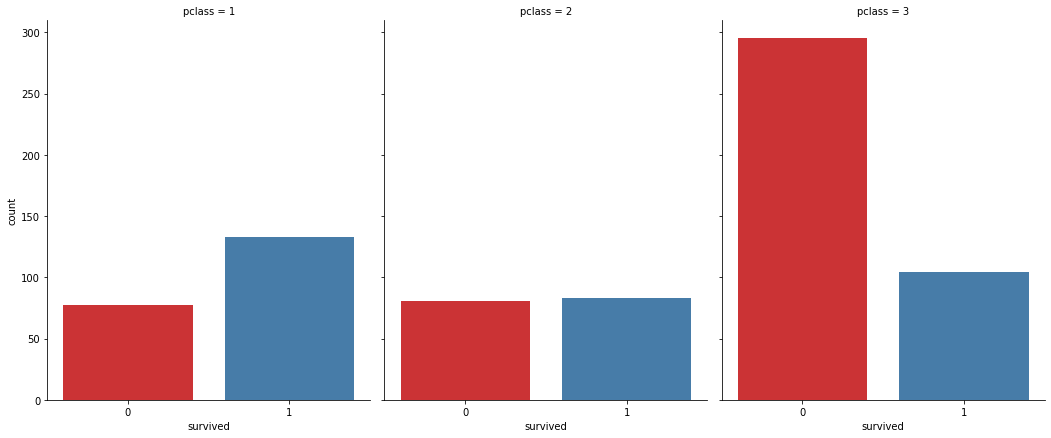

In [26]:
# Plotting bar charts
#
sns.catplot("survived", col="pclass", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the above bar graph, I made the following observations:


*   In the first class, the chances of surviving the disaster was high
*   In the second class, the chances of survivng and not surviving were equal
* In the 3rd class, the chances of not surviving was very high



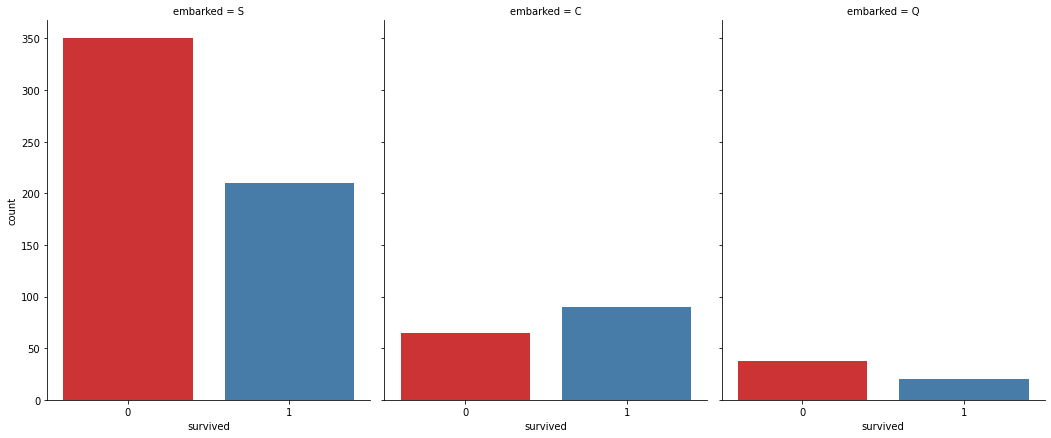

In [27]:
# Plotting bar charts
#
sns.catplot("survived", col="embarked", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the above bar graph, I came up with the following conclusion:


1.   If a passenger embarked from the port of Southampton, there chances of not surviving were very high
2.   If a passenger embarked from the port of Cherbourg, there chances of  surviving were somewhat high
3.  If a passenger embarked from the port of Queenstown, there chances of not   surviving were somewhat high



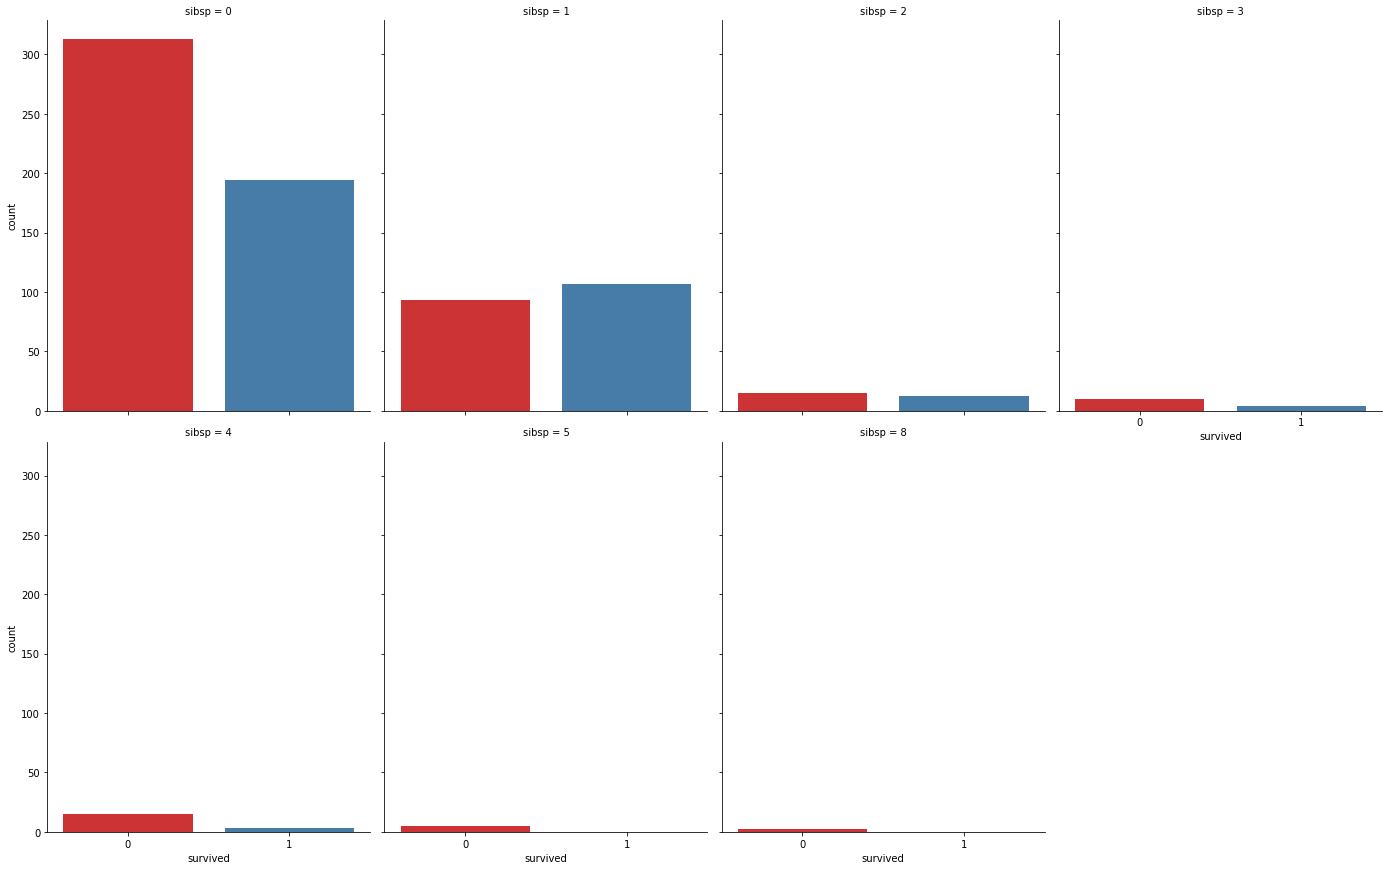

In [28]:
# Plotting bar charts
#
sns.catplot("survived", col="sibsp", col_wrap=4, data=train, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

From the above bar graph, I came up with the following conclusion:


*   If the number  of Siblings/Spouses Aboard was 0,the chances of a passenger not surviving is high,,,,this is quite interesting
*   If the number  of Siblings/Spouses Aboard was 1,the chances of a passenger  surviving is somewhat high
* If the number  of Siblings/Spouses Aboard was 2,the chances of a passenger surving or not surviving was equal
* If the number  of Siblings/Spouses Aboard was 3,4,5,6the chances of a passenger not surviving is somewhat high



In [29]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,0.413972,2.244502,29.525770,0.529107,0.421734,34.874655
std,0.492862,0.853816,13.886982,0.991280,0.841380,52.409853
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,16.000000
75%,1.000000,3.000000,37.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


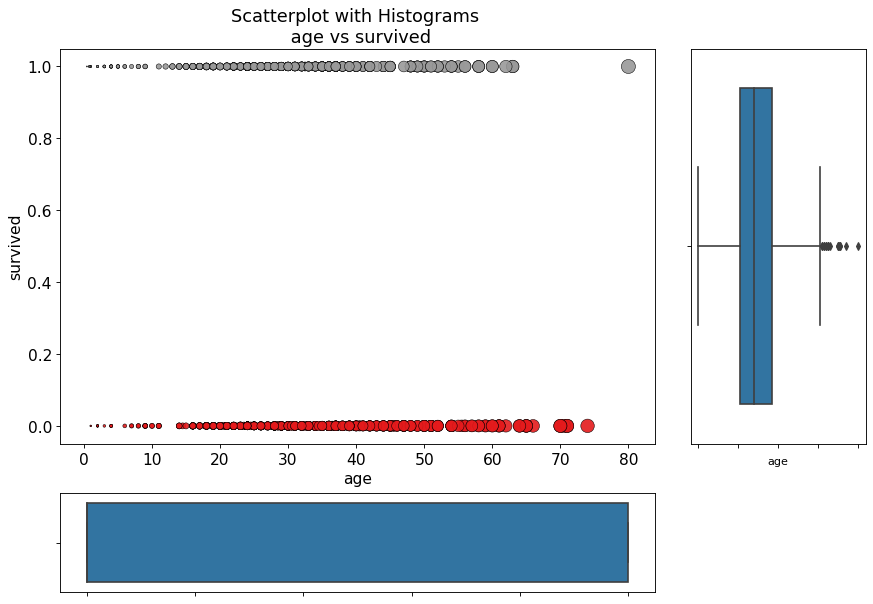

In [30]:
## Scatter Plot to show relationship between variables

# Create Fig and gridspec
#
fig = plt.figure(figsize=(13, 9), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
# Define the axes
#
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
# Scatterplot on main ax
#
ax_main.scatter('age', 'survived', s=train.age*2, c=train.survived, alpha=.9, data=train, cmap="Set1", edgecolors='black', linewidths=.5)
# Add a graph in each part
#
sns.boxplot(train.age, ax=ax_right, orient="v")
sns.boxplot(train.survived, ax=ax_bottom, orient="h")
# Remove x axis name for the boxplot by assigning it to nothing
# This is done to increase visibility
#
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')
# Main Title, Xlabel and YLabel
#
ax_main.set(title='Scatterplot with Histograms \n age vs survived', xlabel='age', ylabel='survived')
# Using a for loop to set the font size of different components
#
ax_main.title.set_fontsize(16)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)    
plt.show()

age is skewed to the right which means that the mean is greater than the mode and the median


In [31]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


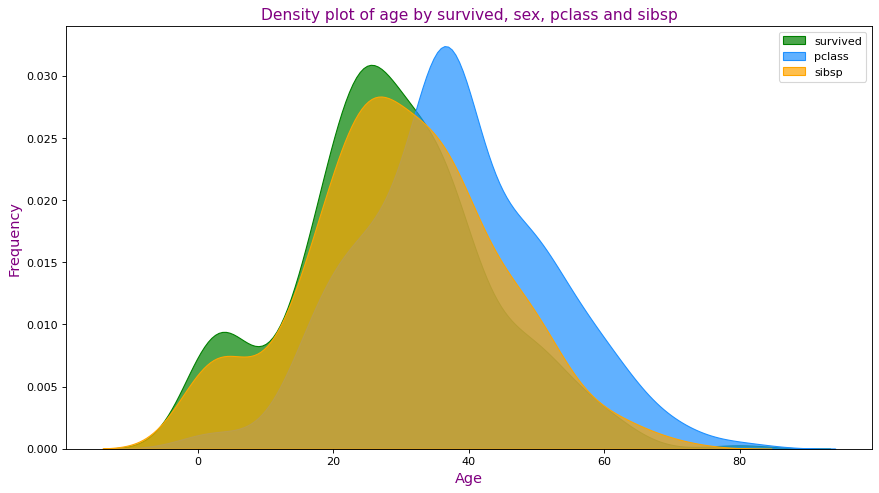

In [32]:
#Density plots to show distributions¶

#Density plots are used tool visualise the distribution of a continuous variables


# Plotting Kernel Density Estimate plots for pregnant, sick, tumor and goitre persons
# Setting the figuresize of the graph to 13 in length and 7 in height
#
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(train.loc[train['survived'] == True, "age"], shade=True, color="g", label="survived", alpha=.7)
sns.kdeplot(train.loc[train['sex'] == True, "age"], shade=True, color="deeppink", label="sex", alpha=.7)
sns.kdeplot(train.loc[train['pclass'] == True, "age"], shade=True, color="dodgerblue", label="pclass", alpha=.7)
sns.kdeplot(train.loc[train['sibsp'] == True, "age"], shade=True, color="orange", label="sibsp", alpha=.7)
plt.title('Density plot of age by survived, sex, pclass and sibsp', fontsize=14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', color = 'purple', fontsize = 13)
plt.legend()
plt.show()



1.   pclass is normally distributed
2.   distribution of people who survived is skewed to the left
3. People at the age of 30 were likely to survive



In [33]:
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,0.413972,2.244502,29.525770,0.529107,0.421734,34.874655
std,0.492862,0.853816,13.886982,0.991280,0.841380,52.409853
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,16.000000
75%,1.000000,3.000000,37.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


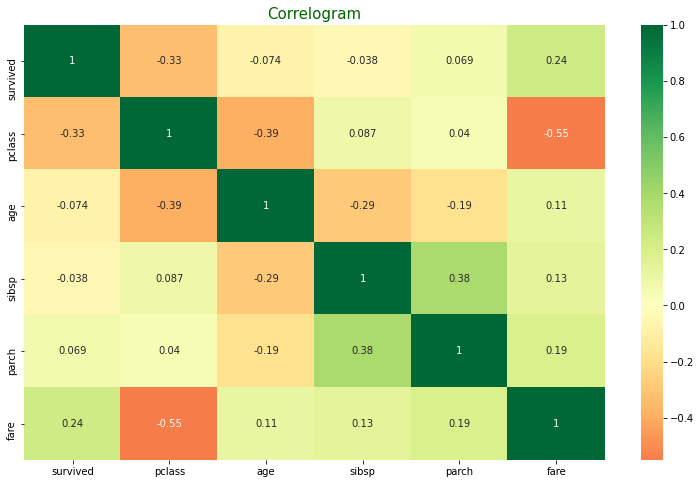

In [34]:
# Plotting a heatmap to show correlations between variables
#
corr = train[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

From the above correlation matrix, I got the following observations


1.   All the independent variables have a weak correlation with the target variable which is survived




PairPlots

In [35]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

<Figure size 480x320 with 0 Axes>

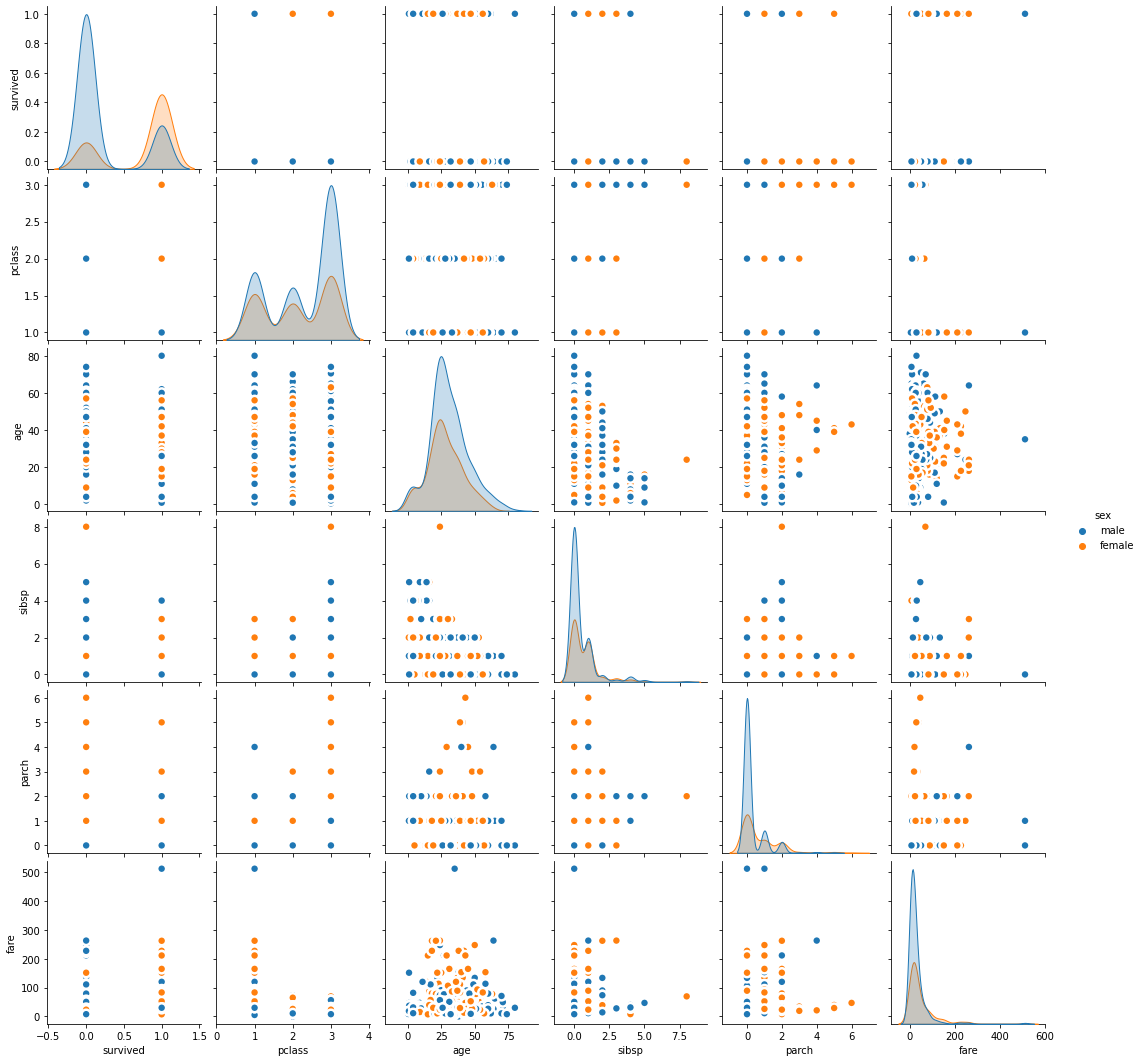

In [36]:
plt.figure(dpi= 80)
sns.pairplot( train[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare','sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [40]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [42]:
# Converting categorical variables to a dummy indicators
# ---
# The next thing we need to do is reformat our variables so that they work with the model. 
# Specifically, we need to reformat the Sex and Embarked variables into numeric variables.
#
gender = pd.get_dummies(train['sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [43]:
embark_location = pd.get_dummies(train['embarked'],drop_first=True)
embark_location.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [44]:
train.drop(['sex', 'embarked'],axis=1,inplace=True)
train.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [45]:
titanic= pd.concat([train,gender,embark_location],axis=1)
titanic.head()

# Now we have a dataset with all the variables in the correct format!

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 7. Implementing the Solution

Baseline Model

In [46]:
 # Splitting our dataset into its attributes and labels
 X = titanic.drop(columns = ['survived'])
y = titanic['survived']

from sklearn.model_selection import train_test_split

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [47]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
###Making predictions
y_pred = classifier.predict(X_test)

In [52]:
# Evaluating the Algorithm
# ---
from sklearn.metrics import accuracy_score              # Used as a metric for evaluation

# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))


[[75 12]
 [23 45]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        87
           1       0.79      0.66      0.72        68

    accuracy                           0.77       155
   macro avg       0.78      0.76      0.77       155
weighted avg       0.78      0.77      0.77       155

The accuracy score of the model is : 0.7741935483870968


When the data is split 80-20, our accuracy score is 77.41% and f1 score is 81 %

The confusion matrix tells us we have 75 True Positive Predictions and 45 True Negative predictions



In [53]:
##splitting the data in 70- 30
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
###Making predictions
y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
from sklearn.metrics import accuracy_score              # Used as a metric for evaluation

# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))


[[103  30]
 [ 45  54]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       133
           1       0.64      0.55      0.59        99

    accuracy                           0.68       232
   macro avg       0.67      0.66      0.66       232
weighted avg       0.67      0.68      0.67       232

The accuracy score of the model is : 0.6767241379310345


The confusion matrix tells us we have 103 True Positive Predictions and 54 True Negative predictions



When data is partioned to 70-30, accuracy score reduces to 67.67 % from 77%

In [54]:
# Splitting the data into train and test sets
# partitioning the data into 60-40 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
###Making predictions
y_pred = classifier.predict(X_test)
# Evaluating the Algorithm
# ---
from sklearn.metrics import accuracy_score              # Used as a metric for evaluation

# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

[[138  42]
 [ 53  77]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       180
           1       0.65      0.59      0.62       130

    accuracy                           0.69       310
   macro avg       0.68      0.68      0.68       310
weighted avg       0.69      0.69      0.69       310

The accuracy score of the model is : 0.6935483870967742


When the data is split in 60 to 40, the accuracy score increases from 67 to 69%

The confusion matrix tells us we have 138 True Positive Predictions and 77 True Negative predictions



## Hyperparameter Tuning

In [55]:
##hyper-parameter tune our model to improve accuracy. We will use the grid search.
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', clf.fit(X_train,y_train))

best parameters: GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [56]:
#fittting our model with the best parameters
clf2 = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:

#predictin with model.
y_pred = clf.predict(X_test)

#assessing the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.6870967741935484


Even after tuning our parameters, our accuracy score still does not improve 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [64]:
# Reviewing the Solution 
#Lets try and use the random forest classifier and see if our model perfomance would increase
# Splitting the data into train and test sets
# partitioning the data into 60-40 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
# Import the model
from sklearn.ensemble import RandomForestRegressor
# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.2761028515909152
Mean Squared Error: 0.13861388015110937
Root Mean Squared Error: 0.37230885048721224


From the results random forest classifier can be used as an alternative of KNN

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?

Conclusions
1. the split of 80-20 had the best accuracy score of 77% as compared to the other model
2. To improve our model, maybe more features that dictate the rate of survival can be used such as if  a passenger had jackets of life saving and other parameters
3. More data should be provided